# This lab focuses on implementing kNN for classification

### We will learn through the spirit of friendly competition!

[Here's](https://en.wikipedia.org/wiki/Iris_flower_data_set) a description of our first dataset

The files of interest are called iris_train.csv and iris_test.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!head data/iris_train.csv

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.0,2.0,3.5,1.0,versicolor
6.9,3.1,5.1,2.3,virginica
7.2,3.0,5.8,1.6,virginica
5.0,3.4,1.6,0.4,setosa
4.9,3.0,1.4,0.2,setosa
6.7,3.0,5.2,2.3,virginica
5.9,3.0,4.2,1.5,versicolor
5.8,2.7,5.1,1.9,virginica
5.7,2.8,4.5,1.3,versicolor


In [3]:
!head data/iris_test.csv

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
4.8,3.1,1.6,0.2
7.2,3.2,6.0,1.8
4.8,3.0,1.4,0.1
4.8,3.0,1.4,0.3
6.7,3.3,5.7,2.1
6.9,3.2,5.7,2.3
6.3,2.9,5.6,1.8
5.5,4.2,1.4,0.2
6.3,3.3,6.0,2.5


In [4]:
train = pd.read_csv('data/iris_train.csv')
test = pd.read_csv('data/iris_test.csv')

In [5]:
train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.0,2.0,3.5,1.0,versicolor
1,6.9,3.1,5.1,2.3,virginica
2,7.2,3.0,5.8,1.6,virginica
3,5.0,3.4,1.6,0.4,setosa
4,4.9,3.0,1.4,0.2,setosa


In [6]:
# notice we don't know the labels!
test.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,4.8,3.1,1.6,0.2
1,7.2,3.2,6.0,1.8
2,4.8,3.0,1.4,0.1
3,4.8,3.0,1.4,0.3
4,6.7,3.3,5.7,2.1


In [7]:
train.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [8]:
# convert species to a categorical - why?
train['Species'] = pd.Categorical(train['Species'])

In [9]:
train.dtypes

Sepal.Length     float64
Sepal.Width      float64
Petal.Length     float64
Petal.Width      float64
Species         category
dtype: object

In [10]:
# do we have any missing data?
train.isnull().any()

Sepal.Length    False
Sepal.Width     False
Petal.Length    False
Petal.Width     False
Species         False
dtype: bool

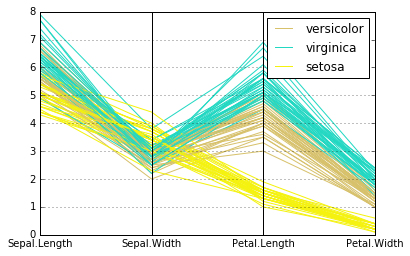

In [11]:
# let's visualize the three species
plt.figure()
pd.tools.plotting.parallel_coordinates(train, 'Species');

### Creating our kNN classifier!

[KNN Classifier on scikit](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

#### Parameters we care about:

- n_neighbors (int): this is our k neighbors
- weights (string): 'uniform' treats all neighbors equally; 'distance' weights neighbors by their distance, where closer neighbors have a higher weight
- p (int): controls the power parameter, 2 for euclidean distance; 1 for manhattan distance

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# traditional to call the observations X
# and the labels y
X, y = train.iloc[:, :-1], train.iloc[:, -1]

In [14]:
X.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.0,2.0,3.5,1.0
1,6.9,3.1,5.1,2.3
2,7.2,3.0,5.8,1.6
3,5.0,3.4,1.6,0.4
4,4.9,3.0,1.4,0.2


In [15]:
y.head()

0    versicolor
1     virginica
2     virginica
3        setosa
4        setosa
Name: Species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [16]:
# starting with k=30
# this creates the classifier
knn = KNeighborsClassifier(n_neighbors=30, weights='uniform', p=2)

In [17]:
# execute this to fit the classifier to our data
# QUIZ: what happens during the fitting process?
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [18]:
# execute this to predict the labels for our "unseen" test data
knn.predict(test)

array(['setosa', 'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'virginica', 'setosa', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'setosa',
       'versicolor', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica'], dtype=object)

### Save your predictions to a csv called submit.csv

- make sure the predictions are a 1-column dataframe with the column name Species
- save the csv in the current directory
- don't include row names (index)

### In the example below, the script calculates the accuracy of our predictions:

- accuracy is just the % of our predictions that were correct!

In [19]:
# run the python script called scorer.py with the
# name of the submission as an argument
!python scorer.py submit.csv

0.94


# Try to get a score of 98% or higher!

## Exploring scoring the algorithm in sklearn

In [20]:
# load the answers so we can check our work
answers = pd.read_csv('data/answers.csv')
answers['Species'] = pd.Categorical(answers['Species'])

In [21]:
# to score our results against the answer key
# using the knn algorithm from sk learn
# that we created earlier, we use .score()
# .score() calculates the accuracy
print knn.score(test, answers['Species'])

0.94


In [1]:
# use matplotlib to make a visualization showing how the score
# changes when we change n_neighbors

# YOUR CODE HERE
scores = []


In [27]:
# describe what you see in your chart and why you think it happens

In [28]:
# pick a level for k that you would use and indicate why you chose it

In [29]:
# does your answer seem reasonable? do you have any concerns or questions?

In [30]:
# how does the dataset play into the strengths and weaknesses of the kNN algorithm?